# Linear Regression


Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is a form of supervised learning and is commonly employed for predictive analysis and modeling. The goal of linear regression is to find the best-fitting linear relationship (a straight line) that represents the observed data.

In a simple linear regression, there is only one independent variable, $X$, and one dependent variable, $Y$. The relationship between $X$ and $Y$ is represented by the equation of a straight line:
$Y=\beta_0+\beta_1 X +\varepsilon$

Where:

*   $Y$ is the dependent variable.
*   $X$ is the independent variable.
*   $\beta_0$ is the y-intercept (the value of $Y$ when $X$ is 0)
*   $\beta_1$ is the slope of the line (the change in $Y$ for a one-unit change in $X$).
*   $\varepsilon$ is the error term, representing the unobserved factors that affect $Y$ but are not included in the model.

The goal is to estimate the values of $\beta_0$ and $\beta_1$ in such a way that the sum of the squared differences between the observed and predicted values of $Y$ (residuals) is minimized.

<img src= "https://higherlogicdownload.s3.amazonaws.com/IMWUC/UploadedImages/92757287-d116-4157-b004-c2a0aba1b048/linear-regression-in-machine-learning.png" >

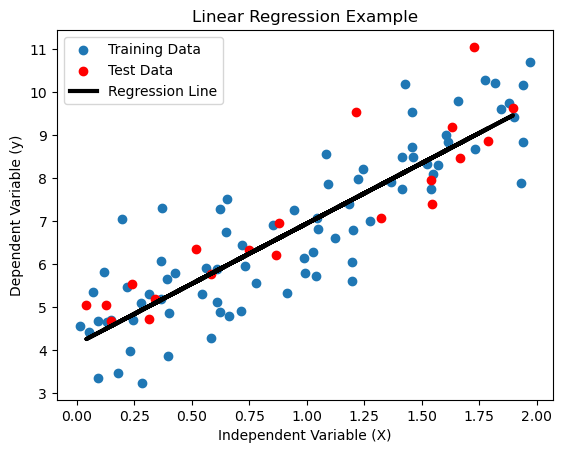

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the training data and the regression line
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='black', linewidth=3, label='Regression Line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

In this analysis, we will utilize the Houston dataset to explore the correlation between various variables. Our primary focus will be on investigating whether there exists a correlation between the growing population of Hispanic population and educational factors across different neighborhoods in Houston.

Firstly, we will conduct a correlation analysis to identify relationships between variables in the dataset. Subsequently, we will specifically examine the correlation between the growing Hispanic population (`totalHispEst`) and educational indicators in Houston neighborhoods.

To achieve this, we will employ linear regression modeling. The selected features, representing educational factors, will be used to predict the `totalHispEst` variable. By fitting a linear regression model, we aim to understand the relationship between the Hispanic population and education, discerning if there is a predictive connection.

The R-squared value resulting from the linear regression model will serve as an indicator of the model's goodness of fit to the data. A higher R-squared value suggests a stronger fit, providing insights into the extent to which educational features contribute to predicting the Hispanic population in Houston neighborhoods.

This analysis aims to shed light on the interplay between demographic trends and educational characteristics in Houston, contributing to a better understanding of the factors influencing the growth of the Hispanic population in different neighborhoods.


In [2]:
# Read the CSV file into a DataFrame named 'variables'
variables= pd.read_csv('tabla_general.csv')

# Display the DataFrame
variables

,Unnamed: 0,yr,cta_code,geo_name,geoid_name,totalPopEst,nonHispWhiteEst,nonHispBlackEst,nonHispAsianEst,nonHispOtherEst,...,popOccHU10MOE,popOccHU11MOE,popOccHU12MOE,popOccHU13MOE,laborforceMOE,medYrStructBuiltMOE,medHouseValMOE,medRent2brMOE,medHHIncMOE,geo_id_k
0,12041,2010,K001,Community Tabulation Area,Downtown,10549,2670,4707,178,97,...,135,257,180,180,NaN,NaN,NaN,NaN,NaN,1
1,12042,2010,K002,Community Tabulation Area,Near Northside,25241,1646,1766,32,109,...,715,694,340,311,NaN,NaN,NaN,NaN,NaN,1
2,12043,2010,K003,Community Tabulation Area,Fifth Ward,18781,481,11258,135,26,...,664,552,393,254,NaN,NaN,NaN,NaN,NaN,1
3,12044,2010,K004,Community Tabulation Area,Kashmere Gardens,9258,94,7027,147,53,...,358,427,254,254,NaN,NaN,NaN,NaN,NaN,1
4,12045,2010,K005,Community Tabulation Area,Denver Harbor / Port Houston,19093,856,1206,12,15,...,741,527,254,254,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,104667,2021,K139,Community Tabulation Area,Highlands,13695,4879,2019,173,481,...,107,423,1152,28,644.0,NaN,NaN,NaN,NaN,1
1712,104668,2021,K140,Community Tabulation Area,Baytown,92684,27037,13920,1294,2139,...,1290,2191,798,143,2199.0,NaN,NaN,NaN,NaN,1
1713,104669,2021,K141,Community Tabulation Area,Katy: Harris,12312,6974,820,488,512,...,182,555,372,24,661.0,NaN,NaN,NaN,NaN,1
1714,104670,2021,K142,Community Tabulation Area,Waller,13100,4668,1314,364,231,...,70,248,558,29,912.0,NaN,NaN,NaN,NaN,1


In [3]:
# Drop specified columns ('geo_id_k' and 'Unnamed: 0') from the DataFrame 'variables' in-place
variables.drop(columns=['geo_id_k','Unnamed: 0'], inplace=True)

# Filter rows in 'variables' to include only those with years from 2010 to 2019
variables = variables[variables['yr'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]

In [4]:
# Check the columns to choose the variables
variables.columns

Index(['yr', 'cta_code', 'geo_name', 'geoid_name', 'totalPopEst',
       'nonHispWhiteEst', 'nonHispBlackEst', 'nonHispAsianEst',
       'nonHispOtherEst', 'totalHispEst', 'totalPopGt25Est', 'educLthsEst',
       'educHsEst', 'educSomeCollEst', 'OccHUTotEst', 'OccHUOwnEst',
       'OccHURentEst', 'popOccHU01Est', 'popOccHU02Est', 'popOccHU03Est',
       'popOccHU04Est', 'popOccHU05Est', 'popOccHU06Est', 'popOccHU07Est',
       'popOccHU08Est', 'popOccHU09Est', 'popOccHU10Est', 'popOccHU11Est',
       'popOccHU12Est', 'popOccHU13Est', 'laborforceEst', 'educLthsEstPct',
       'educHsEstPct', 'educSomeCollEstPct', 'medHHIncEst', 'medHHIncEst2',
       'medYrStructBuiltEst', 'medHouseValEst', 'medHouseValEst2',
       'medRent2brEst', 'medRent2brEst2', 'totalPopMOE', 'nonHispWhiteMOE',
       'nonHispBlackMOE', 'nonHispAsianMOE', 'nonHispOtherMOE', 'totalHispMOE',
       'totalPopGt25MOE', 'educLthsMOE', 'educHsMOE', 'educSomeCollMOE',
       'OccHUTotMOE', 'OccHUOwnMOE', 'OccHURentMOE', 

/var/folders/_n/vpsjjrqj2yb_yy6q_1xgvwg40000gn/T/ipykernel_16763/765332384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = variables.corr()


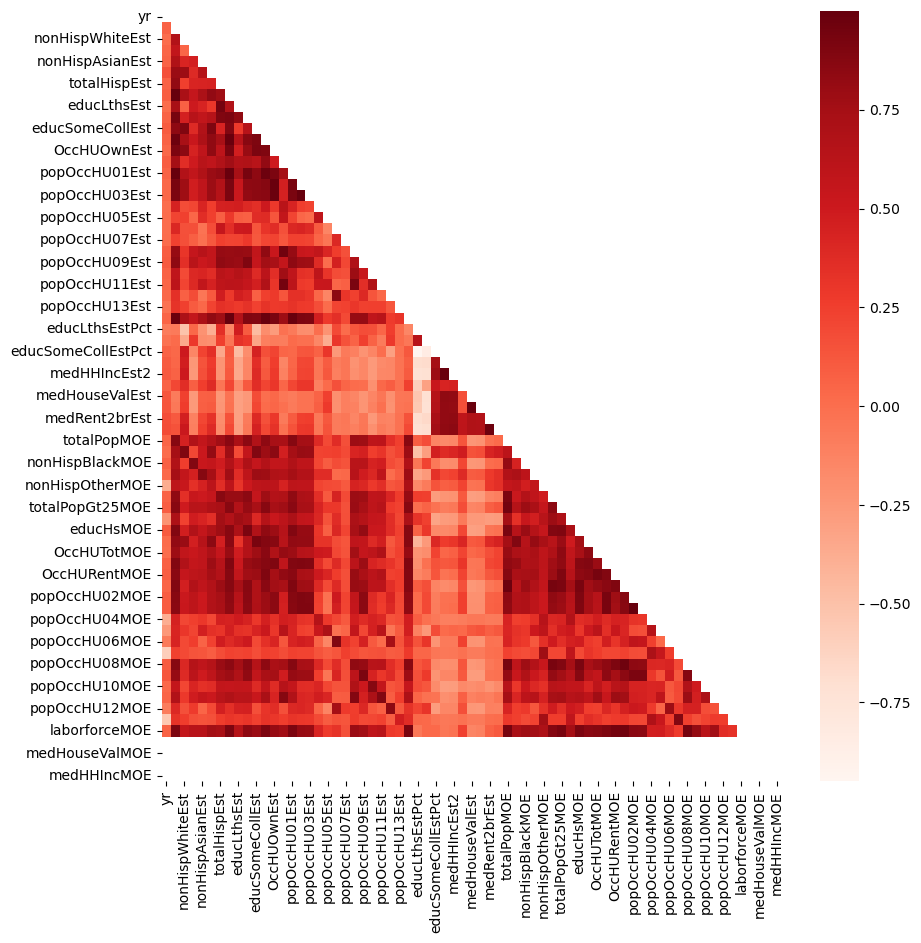

In [5]:
# Calculate the correlation matrix for the DataFrame 'variables'
corr = variables.corr()

# Create a subplot with a specified size for the heatmap
fig, axs = plt.subplots(figsize=(10, 10))

# Generate a heatmap using Seaborn to visualize the correlation matrix
# 'data' parameter: correlation matrix
# 'cmap' parameter: color map for the heatmap
# 'mask' parameter: hides the upper triangle of the matrix for better visualization
sns.heatmap(data=corr, cmap="Reds", mask=np.triu(corr))

# Display the heatmap
plt.show()

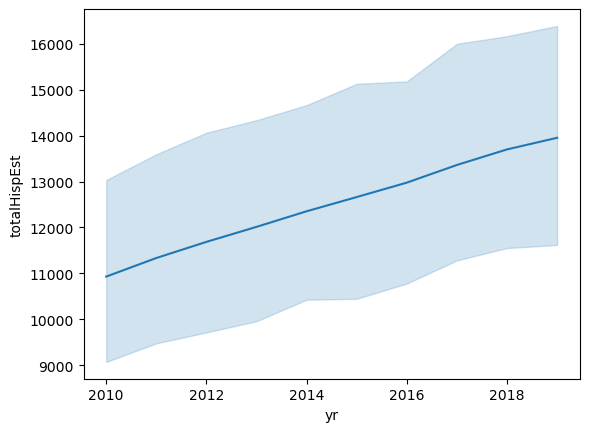

In [6]:
# Create a line plot using Seaborn to visualize the trend of 'totalHispEst' over the years
# 'data' parameter: DataFrame containing the data
# 'x' parameter: column for the x-axis (years)
# 'y' parameter: column for the y-axis (totalHispEst)
sns.lineplot(data=variables, x="yr", y="totalHispEst")

# Display the line plot
plt.show()

In [7]:
# Create a copy of the DataFrame 'variables' named 'dummy'
dummy = variables.copy()

# Perform one-hot encoding on the 'dummy' DataFrame to convert categorical variables into binary columns
dummy = pd.get_dummies(dummy)

# Display the resulting 'dummy' DataFrame
dummy

,yr,totalPopEst,nonHispWhiteEst,nonHispBlackEst,nonHispAsianEst,nonHispOtherEst,totalHispEst,totalPopGt25Est,educLthsEst,educHsEst,...,geoid_name_Waller,geoid_name_Washington / Memorial Park,geoid_name_Washington East,geoid_name_Webster,geoid_name_West University / Southside,geoid_name_Westbury,geoid_name_Westchase,geoid_name_Westwood,geoid_name_Willow Meadows,geoid_name_Willowbrook
0,2010,10549,2670,4707,178,97,2897,7625,2425,2660,...,0,0,0,0,0,0,0,0,0,0
1,2010,25241,1646,1766,32,109,21688,15234,7238,4120,...,0,0,0,0,0,0,0,0,0,0
2,2010,18781,481,11258,135,26,6881,11034,5416,3130,...,0,0,0,0,0,0,0,0,0,0
3,2010,9258,94,7027,147,53,1937,6274,2243,2532,...,0,0,0,0,0,0,0,0,0,0
4,2010,19093,856,1206,12,15,17004,10698,6179,2789,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,2019,13374,5710,2053,80,341,5190,8391,1703,2396,...,0,0,0,0,0,0,0,0,0,0
1426,2019,88587,28433,14411,1652,1938,42153,53754,11774,15266,...,0,0,0,0,0,0,0,0,0,0
1427,2019,14828,8621,478,361,314,5054,10099,1462,2670,...,0,0,0,0,0,0,0,0,0,0
1428,2019,11175,4341,1520,338,278,4698,6453,1022,2031,...,1,0,0,0,0,0,0,0,0,0


In [8]:
# Create a list of column names in the 'dummy' DataFrame that contain the substring "geoid"
list_geoids = list(filter(lambda x: "geoid" in x, dummy.columns))

In [9]:
# Create the feature matrix X and target variable y for linear regression
# Select columns including 'yr', educational estimates, income estimate, occupation estimate, and 'geoid' columns
X = dummy[['yr', 'educSomeCollEst', 'educLthsEst', 'educHsEst', 'medHHIncEst2', 'popOccHU01Est'] + list_geoids]
y = dummy['totalHispEst']

# Import the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
reg = LinearRegression()

# Fit the Linear Regression model to the feature matrix X and target variable y
reg.fit(X, y)


LinearRegression()

In [10]:
# Calculate and print the R-squared value to evaluate the fit of the Linear Regression model
# 'reg.score(X, y)': Calculates the coefficient of determination (R-squared) for the model
r_squared = reg.score(X, y)
print(r_squared)

0.9970376938353994


The linear regression analysis was performed on a dataset containing socio-economic variables, educational estimates, and demographic information. The model, utilizing features such as years, educational levels, income estimates, and occupation data, demonstrated a remarkably high fit to the target variable 'totalHispEst' with an R-squared value of approximately 0.997. This suggests that the selected features explain a significant proportion of the variance in the total Hispanic population estimates. The model can be considered effective in capturing and predicting the trends in the total Hispanic population over the specified years, as evidenced by the strong linear relationship observed.

-----

# Conclusion

In conclusion, linear regression is a powerful statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It employs a linear equation to describe the best-fitting line or hyperplane that minimizes the sum of squared differences between observed and predicted values. Whether in simple linear regression with a single independent variable or multiple linear regression with several predictors, the goal is to quantify and understand the linear association between variables. Linear regression is widely applied in diverse fields for prediction, analysis, and understanding the underlying patterns in data.